## Importing JSON Output as a Pandas Data Frame: Review, Aspects, and Sentiments

In the previous section, we explored the output of the Aspect-Based Sentiment Analysis (ABSA) aspect extractor, which provided us with a structured JSON representation of the extracted aspects and their associated sentiments. To facilitate further analysis and visualization, we will import this JSON output into a Pandas data frame, organizing the data into separate columns for reviews, aspects, and sentiments.

### Importing the JSON Output

To begin, we will use the `json` library to load the JSON output obtained from the aspect extractor. Next, we will transform the data into a Pandas data frame to create a more structured representation.


In [1]:
import pandas as pd
import json

android_df = pd.DataFrame(columns=['review','aspects', 'sentiments'])

In [ ]:
file = open('./android_reviews_aspects_sentiments_new.json')
y = json.load(file)

for i in y:
    android_df = android_df.append({'review': i['sentence'], 'aspects': i['aspect'], 'sentiments': i['sentiment']}, ignore_index=True)

In [ ]:
ios_df = pd.DataFrame(columns=['review','aspects', 'sentiments'])
file = open('./ios_reviews_aspects_sentiments.json')
y = json.load(file)

for i in y:
    ios_df = ios_df.append({'review': i['sentence'], 'aspects': i['aspect'], 'sentiments': i['sentiment']}, ignore_index=True)

### The Data Frame: Review, Aspects, and Sentiments
The resulting data frame `android_df` and `ios_df` will have three columns: `review`, `aspects`, and `sentiments`.

- **Review**: This column represents the original review text from which the aspects were extracted.
- **Aspects (term)**: This column contains the aspect terms identified by the aspect extractor.
- **Sentiments (polarity)**: This column contains the sentiment polarities (positive, negative, or neutral) associated with each aspect.


## Lowercasing Aspect Terms

In the code snippet, we are transforming the aspect terms in the data frames `android_df` and `ios_df` to lowercase. This preprocessing step helps in standardizing the aspect terms and ensures consistency in subsequent analyses.

### Code Explanation

We are using the `apply` function in Pandas to apply a lambda function to each element in the 'aspects' column of the data frames.


In [4]:
android_df['aspects'] = android_df['aspects'].apply(lambda x: [item.lower() for item in x])
ios_df['aspects'] = ios_df['aspects'].apply(lambda x: [item.lower() for item in x])

## Extracting Top N Most Repeated Aspects from Data Frames

In this code snippet, we will extract the top N most repeated aspect terms from the 'aspects' column of data frames `ios_df` and `android_df`. These aspects represent the most commonly mentioned entities or topics in the user reviews, allowing us to focus on the key points that impact the overall sentiment.

In [5]:
from collections import Counter
# Step 3: Convert the list column into a flat list
flat_list = [item for sublist in ios_df['aspects'] for item in sublist]

# Step 4: Count the occurrences of each term in the list
term_counts = Counter(flat_list)

# Step 5: Sort terms based on frequency of occurrence
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Step 6: Get the top N most repeated terms (let's say top 3 here)
top_n = 20
most_repeated_terms = [term for term, _ in sorted_terms[:top_n]]

matched_indices = []
filtered_lists = []
for idx, lst in enumerate(ios_df['aspects']):
    matched_items = [item for item in lst if item in most_repeated_terms]
    matched_indices.append([index for index, item in enumerate(lst) if item in most_repeated_terms])
    filtered_lists.append(matched_items)

# Step 8: Create a new DataFrame with the filtered lists and matched indices
ios_df['top_aspects'] = filtered_lists
ios_df['matched_index'] = matched_indices

ios_df

,review,aspects,sentiments,top_aspects,matched_index
0,Very bad experience with this iPhone xr phone ...,"[back camera, worth]","[Negative, Negative]",[],[]
1,Amazing phone with amazing camera coming from ...,"[camera, service]","[Positive, Positive]",[camera],[0]
2,So I got the iPhone XR just today . The produc...,"[face id, service, service]","[Negative, Negative, Negative]",[],[]
3,I ' ve been an android user all my life until ...,"[camera, battery life, face id, dual sim funct...","[Positive, Positive, Positive, Positive]","[camera, battery life]","[0, 1]"
4,I was delivered a phone that did not work imme...,"[delivered, battery, shipped]","[Negative, Negative, Negative]",[battery],[1]
...,...,...,...,...,...
14717,Absolutely brilliantREAD MORE,[],[],[],[]
14718,"Superb phone . This is my 4th iPhone , I feel ...",[pocket],[Positive],[],[]
14719,very niceREAD MORE,[],[],[],[]
14720,Loving it as of now . Good Product . READ MORE,[],[],[],[]


In [6]:
from pandas.core.describe import DataFrameDescriber
# Step 3: Convert the list column into a flat list
flat_list = [item for sublist in android_df['aspects'] for item in sublist]

# Step 4: Count the occurrences of each term in the list
term_counts = Counter(flat_list)

# Step 5: Sort terms based on frequency of occurrence
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Step 6: Get the top N most repeated terms (let's say top 3 here)
top_n = 20
most_repeated_terms = [term for term, _ in sorted_terms[:top_n]]

matched_indices = []
filtered_lists = []
for idx, lst in enumerate(android_df['aspects']):
    matched_items = [item for item in lst if item in most_repeated_terms]
    matched_indices.append([index for index, item in enumerate(lst) if item in most_repeated_terms])
    filtered_lists.append(matched_items)

# Step 8: Create a new DataFrame with the filtered lists and matched indices
android_df['top_aspects'] = filtered_lists
android_df['matched_index'] = matched_indices

The code above demonstrates how to extract the top N most repeated aspect terms from the 'aspects' column of both the ios_df and android_df data frames. By filtering the aspects based on their frequency of occurrence, we can focus on the most significant aspects that influence the sentiment analysis in the user reviews.

## Text Analysis and Word Cloud Generation

In this section, we'll explore a simple example of text analysis using the Natural Language Toolkit (NLTK) library and generate a word cloud using the WordCloud library. The NLTK library provides tools for processing and analyzing human language text, while the WordCloud library enables us to visualize the most frequent words in a textual dataset.

We will cover two key tasks:
1. Calculating text lengths to understand the distribution of review lengths.
2. Generating a word cloud to visualize the most frequent words in the aspects.

Let's start by importing the necessary libraries and defining the functions we'll use for text analysis and word cloud generation.


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate text lengths
def calculate_text_lengths(reviews):
    return [len(review) for review in reviews]

# Function to create a word cloud from text
def create_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


Average android text lengths: 301.14772727272725
Median android text lengths: 163.0


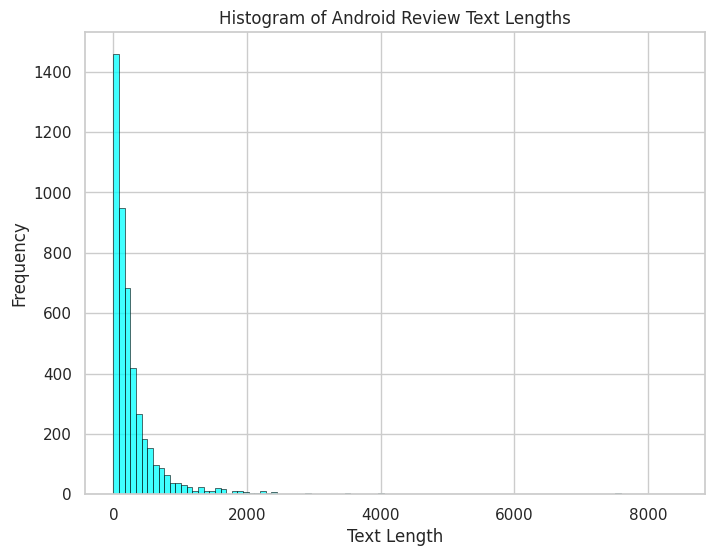

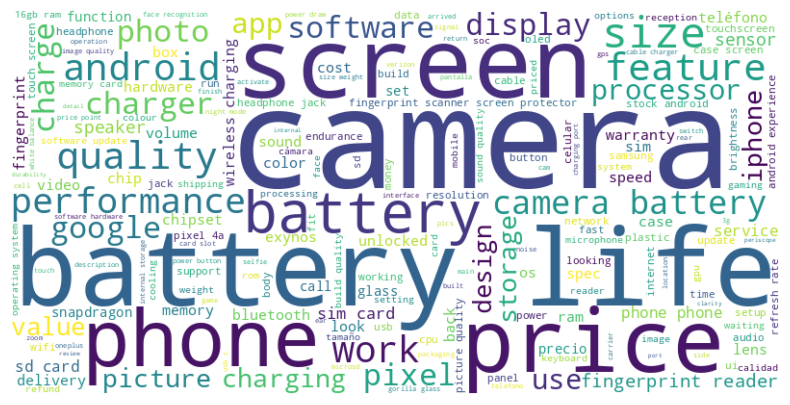

In [8]:
import numpy as np

# Calculate text lengths
android_reviews = android_df['review']
text_lengths = calculate_text_lengths(android_reviews)
print("Average android text lengths:", np.mean(text_lengths))
print("Median android text lengths:", np.median(text_lengths))

# Set style
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(text_lengths, bins=100, kde=False, color='cyan', edgecolor='black')

# Add labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Android Review Text Lengths')

# Display the histogram
plt.show()

# Combine reviews into a single text
aspects = android_df['aspects']
joined_strings = [' '.join(inner_array) for inner_array in aspects]

# Join the resulting strings with a separator
combined_text = '\n'.join(joined_strings)

# Create a word cloud
create_word_cloud(combined_text)

Average ios text lengths: 91.4476973237332
Median ios text lengths: 46.0


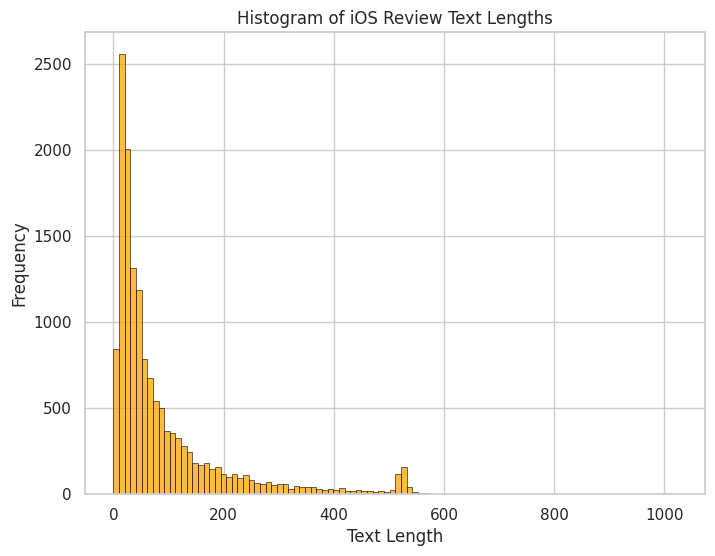

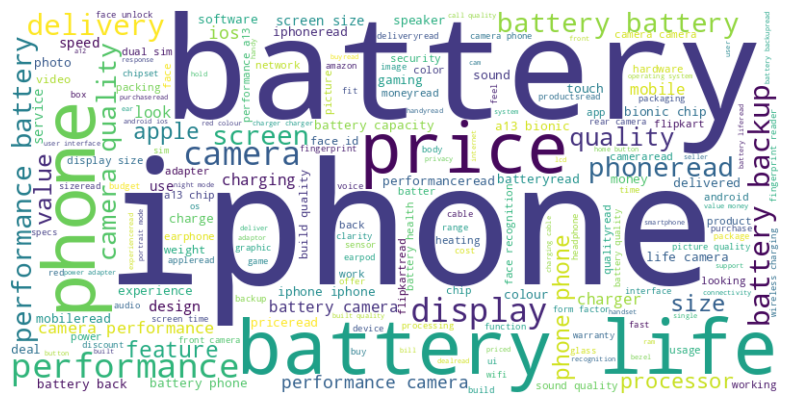

In [9]:
# Calculate text lengths
ios_reviews = ios_df['review']
text_lengths = calculate_text_lengths(ios_reviews)
print("Average ios text lengths:", np.mean(text_lengths))
print("Median ios text lengths:", np.median(text_lengths))

# Set style
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(text_lengths, bins=100, kde=False, color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of iOS Review Text Lengths')

# Display the histogram
plt.show()

# Combine reviews into a single text
aspects = ios_df['aspects']
joined_strings = [' '.join(inner_array) for inner_array in aspects]

# Join the resulting strings with a separator
combined_text = '\n'.join(joined_strings)

# Create a word cloud
create_word_cloud(combined_text)

## Filtering Android Data Frame for Top Aspects and Sentiments

In this section, we will filter the Android data frame to include only the rows that have top aspects. We will then extract the corresponding sentiments for each top aspect and create a new column top_aspects_sentiments in the filtered data frame.

In [10]:
filtered_android_df = android_df[android_df['top_aspects'].map(lambda x: len(x)) > 0]

filtered_sentiments = []
for index, row in filtered_android_df.iterrows():
    filtered_sentiments.append([row['sentiments'][i] for i in row['matched_index']])

filtered_android_df['top_aspects_sentiments'] = filtered_sentiments
filtered_android_df

<ipython-input-10-242853c30968>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_android_df['top_aspects_sentiments'] = filtered_sentiments


,review,aspects,sentiments,top_aspects,matched_index,top_aspects_sentiments
26,"Anonymous , 27 May 2021Actually not having cha...","[charger, usb cable, charger]","[Neutral, Neutral, Neutral]","[charger, charger]","[0, 2]","[Neutral, Neutral]"
27,"CapG , 26 May 2021I like Samsung phones but no...","[charger, earphones, charger, usb cable]","[Negative, Negative, Negative, Neutral]","[charger, charger]","[0, 2]","[Negative, Negative]"
28,I like Samsung phones but not having a charger...,"[charger, earphones]","[Negative, Negative]",[charger],[0],[Negative]
36,"Anonymous , 02 Apr 2021S21 Ultra is one of the...","[bloatware, cameras, price]","[Negative, Negative, Negative]",[price],[2],[Negative]
39,"SgRepeat , 23 Apr 2021My S21 Ultra is taking 1...","[charge, fast charging, charging]","[Negative, Neutral, Neutral]",[charge],[0],[Negative]
...,...,...,...,...,...,...
4644,Good review ! I am coming from a pixel 2xl and...,"[features, camera, price]","[Positive, Negative, Negative]","[features, camera, price]","[0, 1, 2]","[Positive, Negative, Negative]"
4645,"or even better sony 5 II , much better having ...","[bezel, screen, wireless charging]","[Positive, Neutral, Negative]",[screen],[1],[Neutral]
4655,I actually quite like this phone and it ' s th...,"[design, display, battery life, build, cameras...","[Positive, Positive, Positive, Positive, Posit...","[display, battery life, processor, price]","[1, 2, 7, 8]","[Positive, Positive, Positive, Positive]"
4656,Google should fire all cylinders and go full s...,"[iphones, headphone jack, radio, battery life]","[Neutral, Negative, Negative, Negative]",[battery life],[3],[Negative]


In [11]:
filtered_ios_df = ios_df[ios_df['top_aspects'].map(lambda x: len(x)) > 0]

filtered_sentiments = []
for index, row in filtered_ios_df.iterrows():
    filtered_sentiments.append([row['sentiments'][i] for i in row['matched_index']])

filtered_ios_df['top_aspects_sentiments'] = filtered_sentiments
filtered_ios_df

<ipython-input-11-2be418d91753>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ios_df['top_aspects_sentiments'] = filtered_sentiments


,review,aspects,sentiments,top_aspects,matched_index,top_aspects_sentiments
1,Amazing phone with amazing camera coming from ...,"[camera, service]","[Positive, Positive]",[camera],[0],[Positive]
3,I ' ve been an android user all my life until ...,"[camera, battery life, face id, dual sim funct...","[Positive, Positive, Positive, Positive]","[camera, battery life]","[0, 1]","[Positive, Positive]"
4,I was delivered a phone that did not work imme...,"[delivered, battery, shipped]","[Negative, Negative, Negative]",[battery],[1],[Negative]
5,It has been a month since I started using my i...,"[battery life, operating system, dual sim func...","[Positive, Positive, Positive, Negative]",[battery life],[0],[Positive]
6,The phone is hanging . Video quality is not ve...,"[phone, quality]","[Negative, Neutral]","[phone, quality]","[0, 1]","[Negative, Neutral]"
...,...,...,...,...,...,...
14709,iPhone se 2020 is as awesome as its 1st genera...,[iphone],[Positive],[iphone],[0],[Positive]
14710,this iphone is premium but battery is short di...,"[iphone, battery, display]","[Positive, Negative, Negative]","[iphone, battery, display]","[0, 1, 2]","[Positive, Negative, Negative]"
14711,Received in 2 days ! Excellent delivery by Fli...,[delivery],[Positive],[delivery],[0],[Positive]
14714,Awesome phone READ MORE,[phone],[Positive],[phone],[0],[Positive]


## User Reviews Sentiment Summary

In this section, we will generate a sentiment summary for user reviews based on a filtered data frame. The provided code processes each review's top aspects and associated sentiments, aggregating the information to create an insightful sentiment summary.

In [ ]:
ios_summary = {}

for index,row in filtered_ios_df.iterrows():
  temp_aspects = row['top_aspects'];
  temp_sentiments = row['top_aspects_sentiments'];
  for index in range(len(temp_aspects)):
    # Check if key exists in the dictionary
    if temp_aspects[index] not in ios_summary:
      ios_summary[temp_aspects[index]] = {'name': temp_aspects[index], 'total_count': 1, 'pos': 0, 'neg': 0, 'neutral': 0}
    else:
      ios_summary[temp_aspects[index]]['total_count'] += 1

    #Update sentiment
    if temp_sentiments[index] == 'Positive':
       ios_summary[temp_aspects[index]]['pos'] += 1
    elif temp_sentiments[index] == 'Negative':
       ios_summary[temp_aspects[index]]['neg'] += 1
    elif temp_sentiments[index] == 'Neutral':
       ios_summary[temp_aspects[index]]['neutral'] += 1

ios_summary_df = pd.DataFrame(columns=['name','total_count', 'pos', 'neg', 'neutral'])
for key in ios_summary:
    row = ios_summary[key];
    ios_summary_df = ios_summary_df.append(row, ignore_index=True)

In [ ]:
android_summary = {}

for index,row in filtered_android_df.iterrows():
  temp_aspects = row['top_aspects'];
  temp_sentiments = row['top_aspects_sentiments'];
  for index in range(len(temp_aspects)):
    # Check if key exists in the dictionary
    if temp_aspects[index] not in android_summary:
      android_summary[temp_aspects[index]] = {'name': temp_aspects[index], 'total_count': 1, 'pos': 0, 'neg': 0, 'neutral': 0}
    else:
      android_summary[temp_aspects[index]]['total_count'] += 1

    #Update sentiment
    if temp_sentiments[index] == 'Positive':
       android_summary[temp_aspects[index]]['pos'] += 1
    elif temp_sentiments[index] == 'Negative':
       android_summary[temp_aspects[index]]['neg'] += 1
    elif temp_sentiments[index] == 'Neutral':
       android_summary[temp_aspects[index]]['neutral'] += 1

android_summary_df = pd.DataFrame(columns=['name','total_count', 'pos', 'neg', 'neutral'])
for key in android_summary:
    row = android_summary[key];
    android_summary_df = android_summary_df.append(row, ignore_index=True)

In [15]:
android_summary_df

,name,total_count,pos,neg,neutral
0,charger,72,5,56,11
1,price,366,293,63,10
2,charge,57,15,38,4
3,google,69,18,27,24
4,battery life,440,249,179,12
5,screen,337,133,181,23
6,android,61,28,24,9
7,software,66,28,28,10
8,features,82,72,7,3
9,camera,506,354,130,22


No charts were generated by quickchart


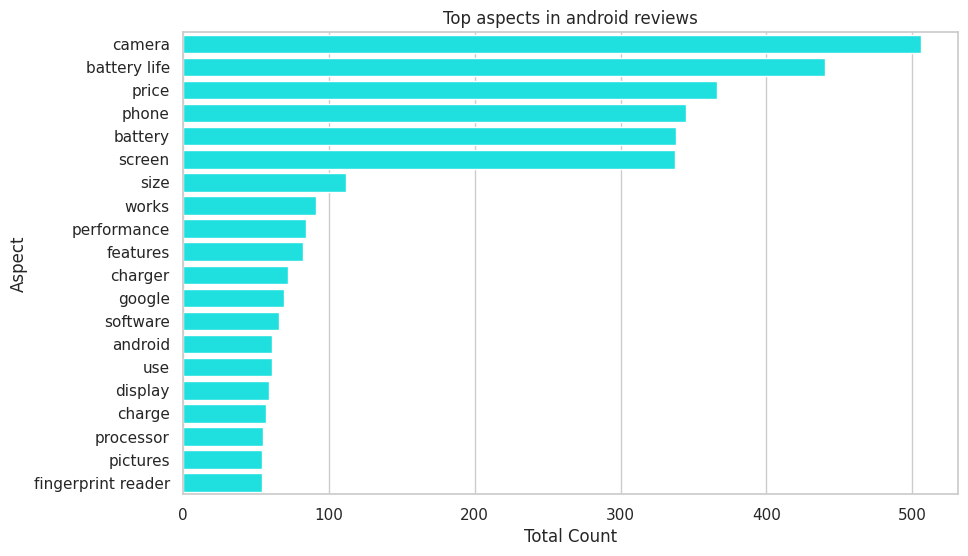

In [14]:
# Set style
sns.set(style="whitegrid")

# Sort the DataFrame by "total_count" in descending order
android_summary_df = android_summary_df.sort_values(by="total_count", ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="total_count", y="name", data=android_summary_df, color='cyan')

# Add labels and title
plt.xlabel('Total Count')
plt.ylabel('Aspect')
plt.title('Top aspects in android reviews')

# Display the plot
plt.show()

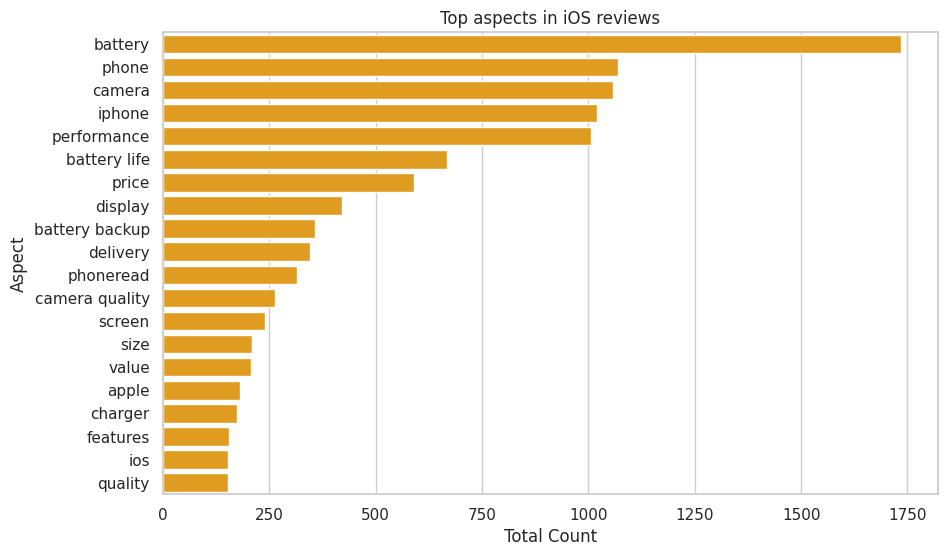

In [15]:
# Set style
sns.set(style="whitegrid")

# Sort the DataFrame by "total_count" in descending order
ios_summary_df = ios_summary_df.sort_values(by="total_count", ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="total_count", y="name", data=ios_summary_df, color='orange')

# Add labels and title
plt.xlabel('Total Count')
plt.ylabel('Aspect')
plt.title('Top aspects in iOS reviews')

# Display the plot
plt.show()

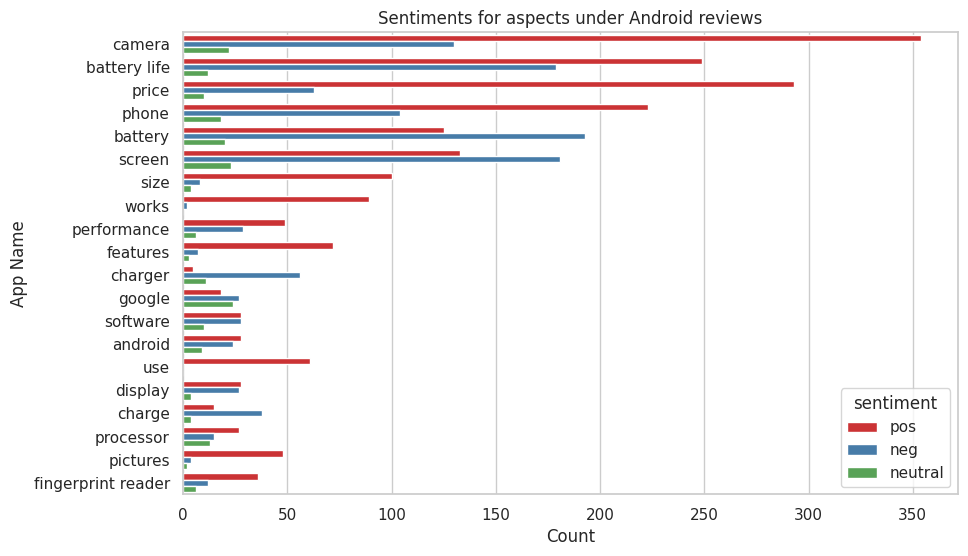

In [16]:
# Melt the DataFrame for plotting
melted_df = pd.melt(android_summary_df[['name','pos','neg','neutral']], id_vars=["name"], var_name="sentiment", value_name="count")

# Set style
sns.set(style="whitegrid")

# Create a stacked bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="name", hue="sentiment", data=melted_df, palette="Set1")

# Add labels and title
plt.xlabel('Count')
plt.ylabel('App Name')
plt.title('Sentiments for aspects under Android reviews')

# Display the plot
plt.show()




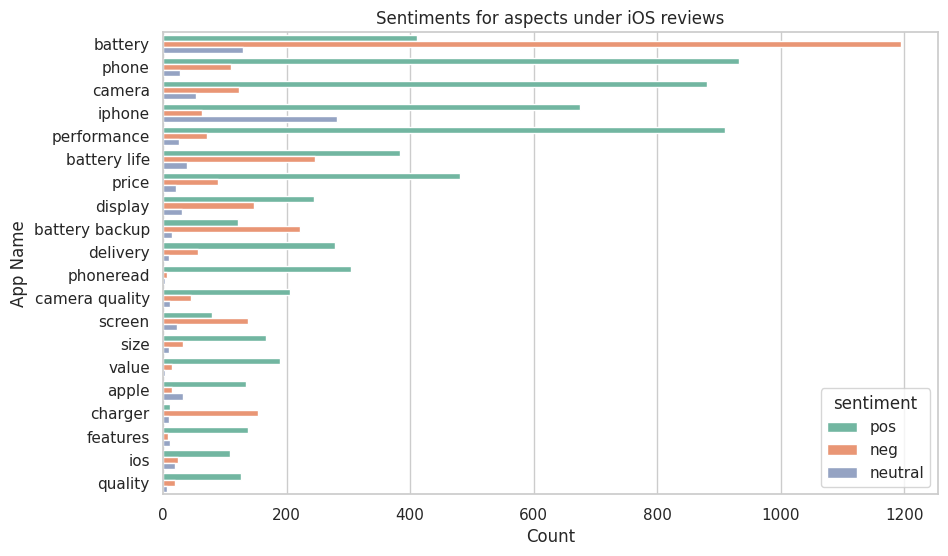

In [17]:
# Melt the DataFrame for plotting
melted_df = pd.melt(ios_summary_df[['name','pos','neg','neutral']], id_vars=["name"], var_name="sentiment", value_name="count")

# Set style
sns.set(style="whitegrid")

# Create a stacked bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="name", hue="sentiment", data=melted_df, palette="Set2")

# Add labels and title
plt.xlabel('Count')
plt.ylabel('App Name')
plt.title('Sentiments for aspects under iOS reviews')

# Display the plot
plt.show()

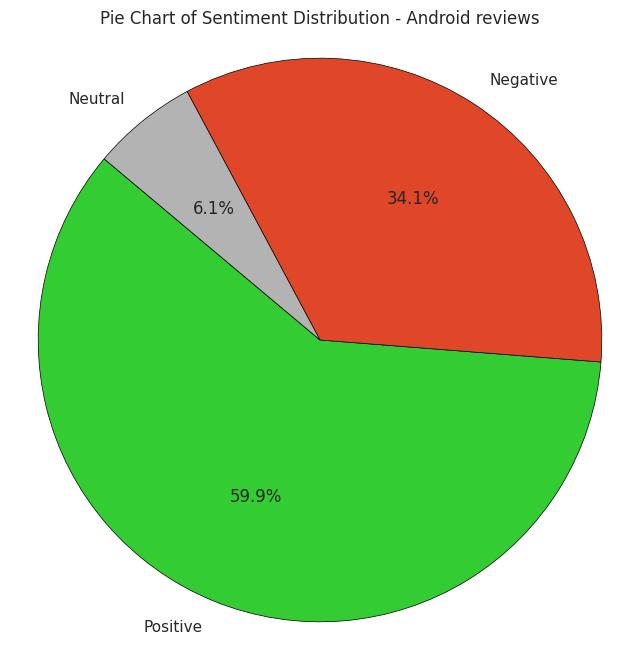

In [18]:
# Calculate total positive, negative, and neutral counts
total_pos = android_summary_df["pos"].sum()
total_neg = android_summary_df["neg"].sum()
total_neutral = android_summary_df["neutral"].sum()

# Labels for the pie chart
labels = ['Positive', 'Negative', 'Neutral']

# Sizes for each section of the pie chart
sizes = [total_pos, total_neg, total_neutral]

# Colors for each section
colors = ['#33cc33', '#e04728', '#b3b3b3']

# Add black outlines to the sections
wedgeprops = {'linewidth': 0.5, 'edgecolor': 'black'}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops)
plt.title('Pie Chart of Sentiment Distribution - Android reviews')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

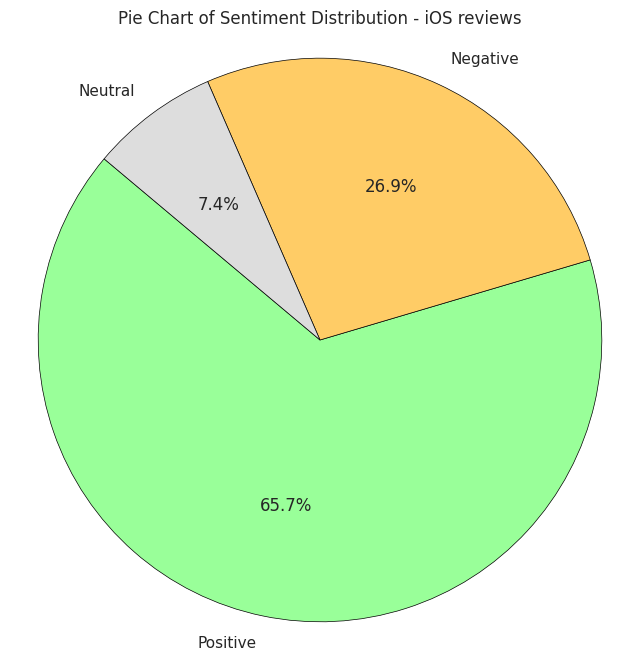

In [19]:
# Calculate total positive, negative, and neutral counts
total_pos = ios_summary_df["pos"].sum()
total_neg = ios_summary_df["neg"].sum()
total_neutral = ios_summary_df["neutral"].sum()

# Labels for the pie chart
labels = ['Positive', 'Negative', 'Neutral']

# Sizes for each section of the pie chart
sizes = [total_pos, total_neg, total_neutral]

# Colors for each section
colors = ['#99ff99', '#ffcc66', '#dddddd']

# Add black outlines to the sections
wedgeprops = {'linewidth': 0.5, 'edgecolor': 'black'}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops)
plt.title('Pie Chart of Sentiment Distribution - iOS reviews')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Preparing Data Frame for Machine Learning Classifiers

In this section, we will focus on the crucial step of preparing the data frame to feed into machine learning classifiers. To train and evaluate classifiers effectively, engineer relevant features, and split it into appropriate training and testing sets.

### Feature Engineering

Feature engineering is the process of selecting, creating, or transforming features to improve the performance of machine learning models. It involves identifying relevant aspects or attributes of the data that are likely to contribute to the model's accuracy. Depending on the problem domain, feature engineering may include selecting specific columns, creating new features through mathematical operations or domain-specific knowledge, and encoding textual data into numerical representations using techniques like TF-IDF or word embeddings.

### Data Splitting

To evaluate the performance of the machine learning classifiers effectively, we need to split the data into training and testing sets. The training set is used to train the model, while the testing set is used to assess how well the model generalizes to unseen data. Proper data splitting ensures that the model's performance is not biased or overfitted to the training data.

Let's proceed with the data preparation process and set the stage for training and evaluating our machine learning classifiers.


In [20]:
# Extracting Common Aspects for iOS and Android

# Extract the aspect keys (names) from the iOS and Android summary dictionaries
ios_aspects = list(ios_summary.keys())
android_aspects = list(android_summary.keys())

# Strings to replace and their replacements for better aspect matching
replace_dict = {'battery life': 'battery', 'ios': 'software',
                'display': 'screen', 'battery backup': 'battery', 'apple': 'brand',
                'camera quality': 'camera', 'price': 'value', 'charge': 'battery', 'google': 'brand',
                'android': 'software', 'iphone': 'brand', 'pixel': 'brand'}

# Replace aspect strings using the map() function to standardize aspect names
ios_aspects = list(map(lambda word: replace_dict[word] if word in replace_dict else word, ios_aspects))
android_aspects = list(map(lambda word: replace_dict[word] if word in replace_dict else word, android_aspects))

# Get the intersection between the two lists to find common aspects
selected_aspects = set(set(ios_aspects).intersection(android_aspects))

selected_aspects

{'battery',
 'brand',
 'camera',
 'charger',
 'features',
 'performance',
 'phone',
 'screen',
 'size',
 'software',
 'value'}

The provided code aims to find the common aspects between the iOS and Android datasets by extracting the aspect keys (names) from the respective summary dictionaries. To ensure better aspect matching and standardization, certain strings are replaced using the replace_dict dictionary. This step helps to handle slight variations or synonyms in aspect names between the two datasets.

Finally, the code calculates the intersection of the two aspect lists to obtain a set of selected aspects that are common between iOS and Android. These common aspects can be used for further analysis and comparison between the two platforms.

By identifying and standardizing common aspects, we can effectively analyze and compare user sentiments and preferences for specific product or service features across both iOS and Android platforms.

In [21]:
def replace_aspects(original_aspects):
  return list(map(lambda word: replace_dict[word] if word in replace_dict else word, original_aspects))

In [22]:
filtered_ios_df['top_aspects'] = filtered_ios_df['top_aspects'].apply(replace_aspects)
filtered_android_df['top_aspects'] = filtered_android_df['top_aspects'].apply(replace_aspects)

<ipython-input-22-673536b01d41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ios_df['top_aspects'] = filtered_ios_df['top_aspects'].apply(replace_aspects)
<ipython-input-22-673536b01d41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_android_df['top_aspects'] = filtered_android_df['top_aspects'].apply(replace_aspects)


In [23]:
# Create a empty dataframe
ml_df = pd.DataFrame(columns=['review', 'battery',
 'brand',
 'camera',
 'charger',
 'features',
 'performance',
 'phone',
 'screen',
 'size',
 'software',
 'value',
                              'to_predict'])

ml_df

,review,battery,brand,camera,charger,features,performance,phone,screen,size,software,value,to_predict


## Creating Feature-Weighted DataFrame for Machine Learning

In this section, we will construct a feature-weighted DataFrame to facilitate machine learning tasks. The provided code iterates through the filtered data frame, calculates weighted scores for specific aspects based on sentiment, and builds a new DataFrame `ml_df` with these weighted features.

### Feature Weightage Dictionary

The `weightage_dict` is defined with pre-assigned weightages for different sentiment categories. Positive sentiments are assigned a weight of 1, negative sentiments -1, and neutral sentiments 0.5. These weightages will be used to determine the overall sentiment impact of each aspect in the reviews.

### Constructing the Feature-Weighted DataFrame

The code iterates through each row in the filtered Android data frame and initializes a new row `new_row` with zero-weighted scores for individual aspects. The aspects considered include 'battery,' 'brand,' 'camera,' 'charger,' 'features,' 'performance,' 'phone,' 'screen,' 'size,' 'software,' and 'value.' Additionally, the 'to_predict' column is set to 0 for android and 1 for iOS, which indicates that these instances are meant for training and evaluation (output feature).

For each aspect in the row's top aspects list, the corresponding sentiment score is retrieved from the `weightage_dict`, and the aspect's score in `new_row` is updated accordingly. This step allows us to calculate the overall sentiment impact of each aspect in the reviews.

The `ml_df` DataFrame is then appended with the new row `new_row`, incorporating the calculated weighted scores for each aspect.

By constructing this feature-weighted DataFrame, we are setting the stage for training machine learning models that can predict sentiments or make inferences based on the specific aspects mentioned in the Android user reviews. This approach allows us to capture the relative importance of different aspects in influencing overall sentiment and user satisfaction.

In [ ]:
weightage_dict = {'Positive': 1, 'Negative': -1, 'Neutral': 0.5}


for index,row in filtered_android_df.iterrows():
  new_row = {'review': row['review'], 'battery': 0.0,'brand': 0.0, 'camera': 0.0,
             'charger': 0.0,'features': 0.0,'performance': 0.0,'phone': 0.0,'screen': 0.0,
             'size': 0.0,'software': 0.0,'value': 0.0,'to_predict': 0}
  temp_aspects = row['top_aspects'];
  temp_sentiments = row['top_aspects_sentiments'];
  for index in range(len(temp_aspects)):
    # Check if key exists in the dictionary
    if temp_aspects[index] in new_row:
        new_row[temp_aspects[index]] += weightage_dict[temp_sentiments[index]]
  ml_df = ml_df.append(new_row, ignore_index=True)

In [ ]:
for index,row in filtered_ios_df.iterrows():
  new_row = {'review': row['review'], 'battery': 0.0,'brand': 0.0, 'camera': 0.0,
             'charger': 0.0,'features': 0.0,'performance': 0.0,'phone': 0.0,'screen': 0.0,
             'size': 0.0,'software': 0.0,'value': 0.0,'to_predict': 1}
  temp_aspects = row['top_aspects'];
  temp_sentiments = row['top_aspects_sentiments'];
  for index in range(len(temp_aspects)):
    # Check if key exists in the dictionary
    if temp_aspects[index] in new_row:
        new_row[temp_aspects[index]] += weightage_dict[temp_sentiments[index]]
  ml_df = ml_df.append(new_row, ignore_index=True)

In [26]:
ml_df

,review,battery,brand,camera,charger,features,performance,phone,screen,size,software,value,to_predict
0,"Anonymous , 27 May 2021Actually not having cha...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,"CapG , 26 May 2021I like Samsung phones but no...",0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,I like Samsung phones but not having a charger...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,"Anonymous , 02 Apr 2021S21 Ultra is one of the...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0
4,"SgRepeat , 23 Apr 2021My S21 Ultra is taking 1...",-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9417,iPhone se 2020 is as awesome as its 1st genera...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9418,this iphone is premium but battery is short di...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1
9419,Received in 2 days ! Excellent delivery by Fli...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9420,Awesome phone READ MORE,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


## Input and Output Split for Sentiment Analysis

In this section, we will discuss the process of splitting the data into input (features) and output (target) variables for sentiment analysis.

### Input (Features)

The input data for sentiment analysis typically consists of textual content (user reviews) that needs to be converted into a numerical representation suitable for machine learning models. In the provided code, the input features are extracted from the DataFrame `ml_df`. These features include the following columns:

- 'battery'
- 'brand'
- 'camera'
- 'charger'
- 'features'
- 'performance'
- 'phone'
- 'screen'
- 'size'
- 'software'
- 'value'

Each column corresponds to a specific aspect of the product or service that has been assigned a weighted score based on the sentiment analysis of user reviews.

### Output (Target)

The output data for sentiment analysis consists of the target variable, which represents the android or iOS smartphone, we want to predict. In this case, the target variable is 'to_predict'.

In [27]:
X = ml_df[['battery',
 'brand',
 'camera',
 'charger',
 'features',
 'performance',
 'phone',
 'screen',
 'size',
 'software',
 'value']]
y = ml_df['to_predict']

## Performing Random Under-Sampling

In this code snippet, we are using the `RandomUnderSampler` from the `imblearn` library to address class imbalance in the target variable. Class imbalance occurs when one class has significantly more instances than the other, leading to biased model performance.

### Random Under-Sampling

The `RandomUnderSampler` randomly selects a subset of the majority class samples to match the number of samples in the minority class. This process helps to balance the class distribution and prevents the model from being overly biased toward the majority class.

### Usage

1. We initialize the `RandomUnderSampler` and create an instance named `undersampler`.
2. Then, we use the `fit_resample` method to perform the under-sampling. The method takes the input features `X` and the target variable `y` as input and returns the resampled feature matrix `X_resampled` and the resampled target vector `y_resampled`.

By applying random under-sampling, we can improve the model's performance, particularly when dealing with imbalanced datasets, and ensure a more accurate and balanced representation of each sentiment category for sentiment analysis.

In [28]:
y = y.astype(int)

In [29]:
from imblearn.under_sampling import RandomUnderSampler


# Initialize RandomUnderSampler
undersampler = RandomUnderSampler()

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [30]:
X_resampled

,battery,brand,camera,charger,features,performance,phone,screen,size,software,value
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4169,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4170,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4171,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4172,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting Data into Training and Testing Sets

In this section, we will discuss how to split the resampled data into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module.

### Data Splitting

To build and evaluate machine learning models effectively, we divide the data into two distinct sets: the training set and the testing set. The training set is used to train the model, while the testing set is used to assess its performance on unseen data. This process helps us understand how well the model generalizes to new and previously unseen instances.

### `train_test_split` Function

The `train_test_split` function is a widely used tool in machine learning. It randomly divides the data into training and testing sets while preserving the proportion of samples for each sentiment category. The function takes several input arguments:

- `X_resampled`: The feature matrix obtained after random under-sampling, containing the resampled input features.
- `y_resampled`: The resampled target vector representing the resampled sentiment categories.
- `test_size`: The proportion of the data to be included in the testing set. In this case, it is set to 0.2, meaning 20% of the data will be used for testing, and 80% will be used for training.
- `stratify`: This parameter ensures that the class distribution in the training and testing sets reflects that of the original data. It is set to `y_resampled` to maintain the balance between sentiment categories after under-sampling.

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,stratify=y_resampled)

## Building and Evaluating Machine Learning Models

In this section, we will explore the process of building and evaluating machine learning models for predicting software based on user reviews. The code provided demonstrates the implementation and evaluation of three different classifiers: Logistic Regression, Random Forest Classifier, and Gaussian Naive Bayes.

### Logistic Regression

The initial step involves using the `LogisticRegression` classifier. We initialize the model, fit it to the training data using `X_train` and `y_train`, and then make predictions on the test set (`X_test`). The accuracy of the predictions is calculated using the `accuracy_score` function, which measures how well the predicted sentiments match the actual sentiments in the test set.

### Random Forest Classifier

The code further introduces the `RandomForestClassifier`. This ensemble model is initialized with settings to handle class imbalance (`class_weight='balanced'`) and is trained on the training data. Similar to the Logistic Regression, predictions are made on the test set (`X_test`), and the accuracy is calculated using `accuracy_score`.

### Gaussian Naive Bayes

Lastly, the code showcases the `GaussianNB` classifier, a probabilistic model for classification. We initialize the model, fit it using the training data, make predictions on the test set, and compute accuracy using `accuracy_score`.

### Model Comparison

By evaluating the accuracy of each model, we can compare their performance in predicting smartphone softwares accurately. Different models might have varying strengths and weaknesses, and assessing their accuracy allows us to determine which model is the most suitable for our specific sentiment analysis task.

In summary, this code snippet demonstrates the complete process of building, training, and evaluating machine learning models for sentiment analysis using multiple classifiers. The calculated accuracy scores provide valuable insights into the effectiveness of each model in predicting sentiment categories based on the aspect-weighted features extracted from user reviews.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

Prediction Accuracy: 0.6311377245508982


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize and fit the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions on the test set using RandomForestClassifier
rf_y_pred = rf_model.predict(X_test)

# Calculate prediction accuracy using RandomForestClassifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Prediction Accuracy:", rf_accuracy)

# Initialize and fit the Gaussian Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set using Gaussian Naive Bayes
nb_y_pred = nb_model.predict(X_test)

# Calculate prediction accuracy using Gaussian Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("Naive Bayes Prediction Accuracy:", nb_accuracy)

Random Forest Prediction Accuracy: 0.6802395209580838
Naive Bayes Prediction Accuracy: 0.6311377245508982


In [37]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Confusion Matrix: Random Forest


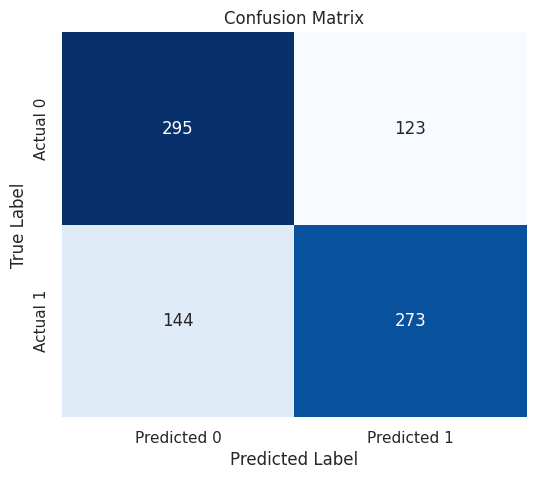

Confusion Matrix: Naive Bayes


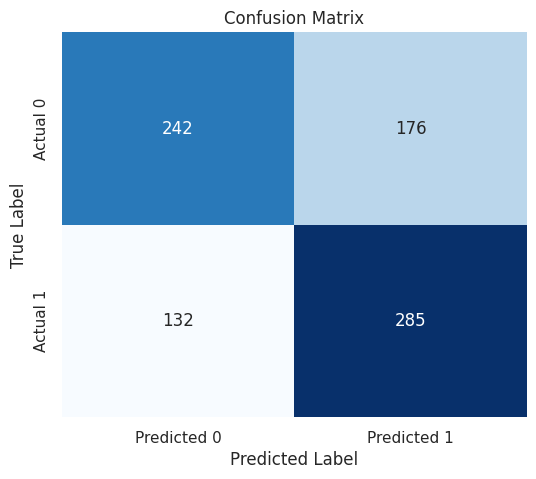

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)

print("Confusion Matrix: Random Forest")
# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, nb_y_pred)

print("Confusion Matrix: Naive Bayes")
# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Fine-Tuning Random Forest Classifier with GridSearchCV

After selecting the Random Forest Classifier as the chosen model from the previously demonstrated classifiers, we can enhance its performance through hyperparameter tuning using the `GridSearchCV` technique.

### GridSearchCV: Hyperparameter Tuning

Hyperparameters are crucial settings that influence a model's performance. Hyperparameter tuning involves finding the best combination of hyperparameters to optimize the model's accuracy. `GridSearchCV` is a powerful method that systematically searches through a predefined grid of hyperparameter values to identify the combination that yields the best results.

### Initializing and Configuring GridSearchCV

1. We initialize the `RandomForestClassifier` again, this time with fewer default hyperparameters.
2. The `param_grid` dictionary defines a range of hyperparameters to explore. It includes values for `n_estimators`, `min_samples_split`, `min_samples_leaf`, `max_features`, and `criterion`.
3. We then initialize `GridSearchCV` with the `RandomForestClassifier` and the `param_grid`. The `cv` parameter determines the number of cross-validation folds used for evaluation, and `scoring` specifies the evaluation metric.

### Fitting GridSearchCV

We fit `GridSearchCV` to the training data (`X_train` and `y_train`). This process exhaustively searches through the provided hyperparameters and cross-validation folds to find the optimal combination.

### Best Parameters and Estimator

We obtain the best parameters and best estimator using the `.best_params_` and `.best_estimator_` attributes of the fitted `GridSearchCV`.

### Model Evaluation with Best Estimator

Finally, we make predictions on the test set using the best estimator and calculate the accuracy of the predictions. The accuracy score provides an objective measure of how well the fine-tuned Random Forest Classifier performs on the test data.

By leveraging `GridSearchCV` for hyperparameter tuning, we ensure that the Random Forest model is configured optimally for sentiment analysis. The process enhances the model's ability to accurately predict the output label.

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,min_samples_leaf=1)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100,150,200],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1],
    'max_features': ['sqrt', None],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with the RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate prediction accuracy using the best estimator
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Prediction Accuracy:", accuracy)
print("Best Parameters:", best_params)

Random Forest Prediction Accuracy: 0.6742514970059881
Best Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


### Fitting with the best parameters

In [40]:
final_rf_model = RandomForestClassifier(criterion='gini',
                                        max_features='sqrt',
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        n_estimators=200)

final_rf_model.fit(X_resampled,y_resampled)

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [41]:
# Get feature importance scores
feature_importance_scores = final_rf_model.feature_importances_

# Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance_scores})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the feature importance scores
print(feature_importance_df)

        Feature  Importance
1         brand    0.222748
5   performance    0.167950
0       battery    0.125569
2        camera    0.101333
7        screen    0.097996
10        value    0.067371
6         phone    0.062022
9      software    0.059827
8          size    0.039324
3       charger    0.029596
4      features    0.026264


In [42]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 10.1 MB/s eta 0:00:00


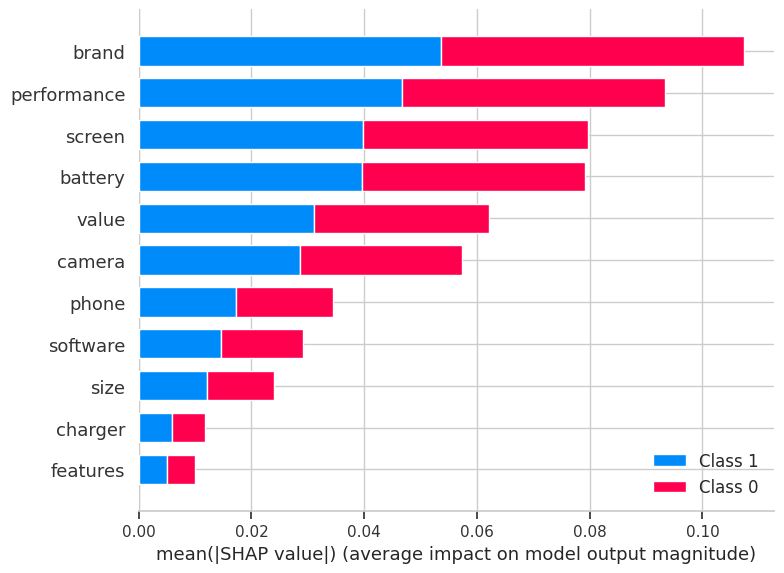

In [47]:
import shap

# Initialize a SHAP TreeExplainer
explainer = shap.TreeExplainer(final_rf_model)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_resampled)

# Create a SHAP summary plot for the entire dataset
shap.summary_plot(shap_values, X_resampled)

# Display the SHAP summary plot

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


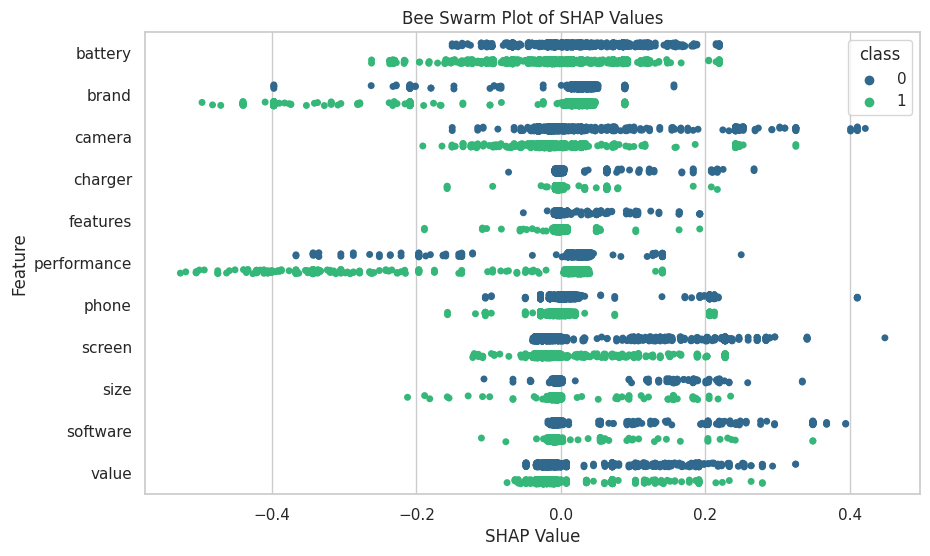

In [64]:
feature_names = X_resampled.columns
# Create a DataFrame with SHAP values and features
shap_df = pd.DataFrame(shap_values[0], columns=feature_names)
shap_df['class'] = y_resampled
# Melt the DataFrame for bee swarm plotting
melted_df = pd.melt(shap_df, id_vars=['class'], value_vars=feature_names)

# Set style
sns.set(style="whitegrid")

# Create a bee swarm plot using seaborn
plt.figure(figsize=(10, 6))
sns.stripplot(x="value", y="variable", hue="class", data=melted_df, palette="viridis", dodge=True)

# Add labels and title
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.title('Bee Swarm Plot of SHAP Values')

# Display the plot
plt.show()

In [88]:
# Calculate the mean SHAP values
mean_shap_values = np.mean(shap_values, axis=0)
mean_shap_values

array([[ 1.07552856e-16,  2.04697370e-16, -3.30790083e-16, ...,
         1.32272665e-17,  7.39425882e-17, -2.50233861e-16],
       [-2.70616862e-16,  2.81025203e-16, -5.34294831e-16, ...,
        -1.53956708e-17, -2.03830008e-17,  2.32452946e-16],
       [-6.33174069e-16,  4.37150316e-16, -3.15719673e-16, ...,
        -3.85975973e-17,  7.02563008e-17,  5.03069808e-17],
       ...,
       [-5.82867088e-16, -4.68375339e-17, -1.77375475e-16, ...,
        -4.85722573e-17, -7.37257477e-17, -1.89084859e-16],
       [-1.76941795e-15,  4.85722573e-17, -2.04317899e-16, ...,
         7.19910243e-17, -2.34187669e-17,  1.42247325e-16],
       [-4.24139890e-16, -5.89805982e-17, -1.35308431e-16, ...,
        -1.73472348e-17, -1.73472348e-17, -7.45931095e-17]])

In [ ]:
# Initialize a SHAP TreeExplainer
explainer = shap.TreeExplainer(final_rf_model)

# Calculate SHAP values for the entire dataset
shap_obj= explainer(X_resampled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


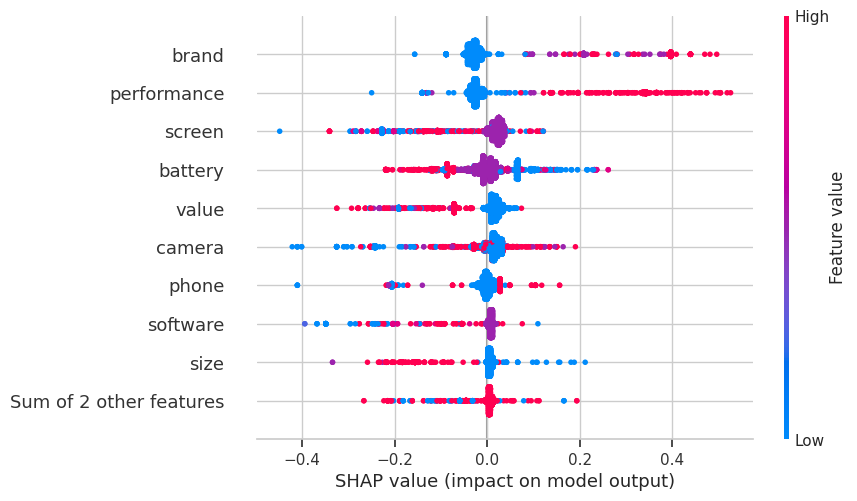

In [93]:
shap.plots.beeswarm(shap_obj[:,:,1])